Imports

In [1]:
import numpy as np
import pandas as pd

from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

Exporting Dataset

In [2]:
import pandas as pd
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split

# Loading CSV files
train_data = pd.read_csv('/content/fashion-mnist_train.csv')
test_data = pd.read_csv('/content/fashion-mnist_test.csv')

Normalizing the dataset

In [3]:
# Assuming the last column is the label
X_train = train_data.iloc[:, :-1] / 255.0
y_train = train_data.iloc[:, -1]

X_test = test_data.iloc[:, :-1] / 255.0
y_test = test_data.iloc[:, -1]


Extraction of features

In [7]:
# Extraction of features and labels
X_train = train_data.drop('label', axis=1).astype('float32')
y_train = train_data['label'].values
X_test = test_data.drop('label', axis=1).astype('float32')
y_test = test_data['label'].values

Dimensions

In [4]:
print('Train: ', train_data.shape)
print('Test: ', test_data.shape)

Train:  (60000, 785)
Test:  (10000, 785)


In [5]:
# Separating features and labels
X = train_data.drop('label', axis=1)
y = train_data['label']

X_test = test_data.drop('label', axis=1)
y_test = test_data['label']

Using Standard Scaler

In [8]:
from sklearn.preprocessing import StandardScaler
# Normalizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Applying PCA

In [9]:
# Applying PCA for dimensionality reduction
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Initialize a dictionary to store model accuracies
model_accuracies = {}

Support Vector Machine

Training time 1370.0503907203674
Testing time 42.43775200843811


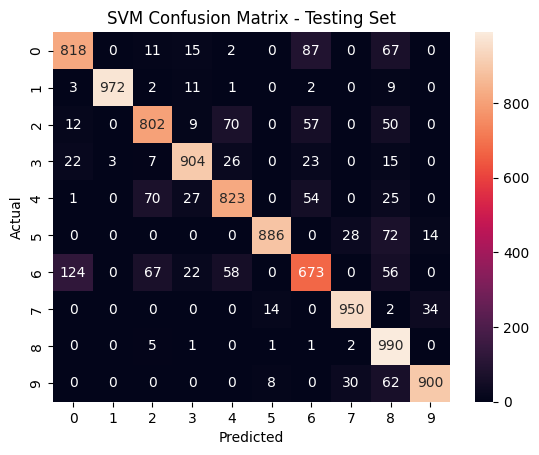

SVM Training Accuracy: 0.9997
SVM Testing Accuracy: 0.8718


In [10]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import time

# Use the best parameters to train the final model

svm_model = SVC(C=13,kernel='rbf',gamma="auto",probability = True)
start_time = time.time()
svm_model.fit(X_train_pca, y_train)
end_time = time.time()
print('Training time', end_time - start_time)

# Predict and calculate accuracy
y_pred_train_svm = svm_model.predict(X_train_pca)
start_time = time.time()
y_pred_test_svm = svm_model.predict(X_test_pca)
end_time = time.time()
print('Testing time', end_time - start_time)

accuracy_train_svm = accuracy_score(y_train, y_pred_train_svm)
accuracy_test_svm = accuracy_score(y_test, y_pred_test_svm)
model_accuracies['SVM'] = (accuracy_train_svm, accuracy_test_svm)

# Confusion Matrix for test Set
cm_svm = confusion_matrix(y_test, y_pred_test_svm)
sns.heatmap(cm_svm, annot=True, fmt='d')
plt.title('SVM Confusion Matrix - Testing Set')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(f'SVM Training Accuracy: {accuracy_train_svm}')
print(f'SVM Testing Accuracy: {accuracy_test_svm}')

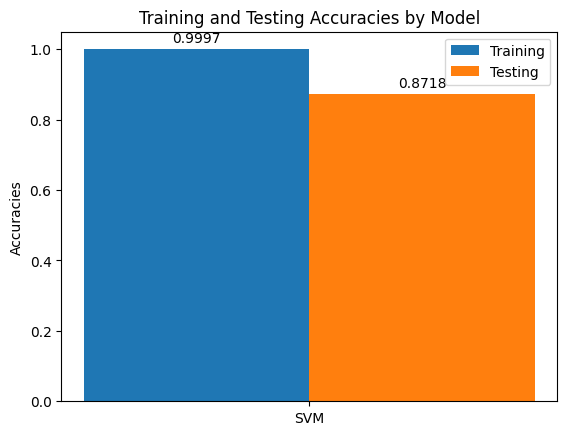

In [11]:
# Preparing data for bar chart
labels = list(model_accuracies.keys())
training_accuracies = [acc[0] for acc in model_accuracies.values()]
testing_accuracies = [acc[1] for acc in model_accuracies.values()]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, training_accuracies, width, label='Training')
rects2 = ax.bar(x + width/2, testing_accuracies, width, label='Testing')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracies')
ax.set_title('Training and Testing Accuracies by Model')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

plt.show()